In [2]:
# #imports
# #Main Library (Actual Neural Network Part)
import tensorflow as tf
from tensorflow import keras
from keras import datasets, layers, models

# #Helper Libraries (in order to interpret and view the data)
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#Prints if a GPU is detected by the TensorFlow system
print(len(tf.config.list_physical_devices('GPU')) > 0)

True


In [4]:
#importing the MNIST dataset from tensorflow
from tensorflow.keras.datasets import mnist 
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

[1]
[3]
[5]
[7]
[2]
[0]
[13]
[15]
[17]
[4]


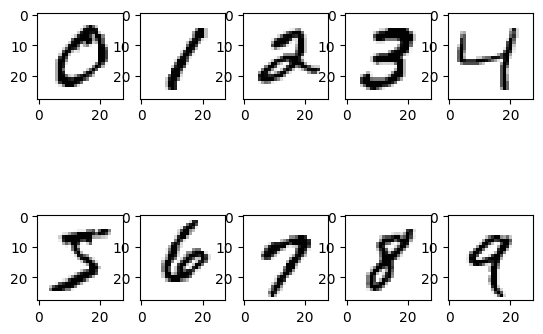

In [5]:
#validating the data (making sure this is the data I want)
fig, ax = plt.subplots(2,5)
ax = ax.flatten()
for i in range(10):
    im_idx = np.argwhere(Y_train == i)[0]
    print(im_idx)
    plottable_image = np.reshape(X_train[im_idx], (28, 28))
    ax[i].imshow(plottable_image, cmap='gray_r')

In [6]:
#checking the format of the data because I want the data to be scaled from 0 to 1
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [7]:
#scaling the data from 0 to 1 as float (decimal) numbers
X_train, X_test = X_train / 255.0, X_test / 255.0

In [8]:
#creating the model - Sequential 
model = models.Sequential()
#first conv. layer and pooling layer
model.add(layers.Conv2D(4, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
#second conv. layer and pooling layer
model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
#last conv. layer
model.add(layers.Conv2D(32, (3, 3), activation='relu'))

In [9]:
#checking the output shape of the last conv. layer, so I can set the last Dense layer correctly 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 4)         40        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 4)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 16)        592       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 32)          4640      
                                                                 
Total params: 5,272
Trainable params: 5,272
Non-trainabl

In [10]:
#Flattening layer will create vectors in order for the neural netowrk to actually make predictions
model.add(layers.Flatten())
#adding the last dense layer to allow the neural network to classify the images
model.add(layers.Dense(32, activation = 'relu'))
#classification layer
model.add(layers.Dense(10, activation = "softmax"))

In [11]:
#confirming that my model is correct
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 4)         40        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 4)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 16)        592       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 32)          4640      
                                                                 
 flatten (Flatten)           (None, 288)               0

In [12]:
#compiler which configures the model
model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics = ['accuracy'])

In [13]:
#verifying that the this is a completely untrained neural network
model.evaluate(x = X_train, y = Y_train)

1875/1875 [==============================] - 15s 6ms/step - loss: 2.3094 - accuracy: 0.1152


[2.3094449043273926, 0.11524999886751175]

In [14]:
#training the model
history = model.fit(x = X_train, y = Y_train, batch_size = 10, epochs = 20, verbose = 1,
                    shuffle = True)

Epoch 1/20
6000/6000 [==============================] - 59s 10ms/step - loss: 0.2032 - accuracy: 0.9353
Epoch 2/20
6000/6000 [==============================] - 56s 9ms/step - loss: 0.0675 - accuracy: 0.9792
Epoch 3/20
6000/6000 [==============================] - 50s 8ms/step - loss: 0.0497 - accuracy: 0.9841
Epoch 4/20
6000/6000 [==============================] - 51s 8ms/step - loss: 0.0406 - accuracy: 0.9871
Epoch 5/20
6000/6000 [==============================] - 65s 11ms/step - loss: 0.0350 - accuracy: 0.9889
Epoch 6/20
6000/6000 [==============================] - 96s 16ms/step - loss: 0.0303 - accuracy: 0.9900
Epoch 7/20
6000/6000 [==============================] - 99s 16ms/step - loss: 0.0272 - accuracy: 0.9912
Epoch 8/20
6000/6000 [==============================] - 97s 16ms/step - loss: 0.0240 - accuracy: 0.9922
Epoch 9/20
6000/6000 [==============================] - 68s 11ms/step - loss: 0.0216 - accuracy: 0.9930
Epoch 10/20
6000/6000 [==============================] - 94s 16ms/s

In [15]:
#saving the model so I don't have to keep training the network
model.save('complete_saved_mnist_model')

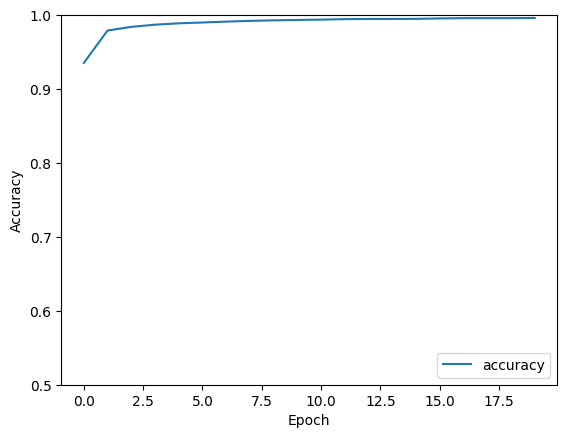

In [18]:
#checking the training accuracy 
plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [19]:
#testing the model on the testing dataset
model.evaluate(x = X_test,y = Y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0627 - accuracy: 0.9867


[0.06267417222261429, 0.9866999983787537]